In [8]:
import numpy as np
from numpy import random
import statsmodels.api as sm
import seaborn as sns
sns.set_color_codes(palette="deep")
random.seed(42)

n = 500
sigma = 2
beta = np.array([2, -0.1, 0])
X1 = random.normal(loc=0, scale=sigma, size=n)
X2 = random.normal(loc=0, scale=sigma, size=n)
eps = random.normal(loc=0, scale=sigma, size=n)
X = np.array([np.ones(n),X1, X2]).T
Y = np.dot(X, beta)+eps 
mod0 = sm.OLS(Y, X).fit()
print(mod0.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     7.310
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           0.000743
Time:                        14:19:22   Log-Likelihood:                -1058.5
No. Observations:                 500   AIC:                             2123.
Df Residuals:                     497   BIC:                             2136.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2130      0.090     24.532      0.0

In [9]:
nsim = 5000
b1_pvalue = []
b2_pvalue = []

for i in np.arange(0,nsim,1):
    random.seed(42+i)
    X1 = random.normal(loc=0, scale=sigma, size=n)
    X2 = random.normal(loc=0, scale=sigma, size=n)
    eps = random.normal(loc=0, scale=sigma, size=n)
    X = np.array([np.ones(n),X1, X2]).T
    Y = np.dot(X, beta)+eps 
    mod0 = sm.OLS(Y, X).fit()
    b1_pvalue.append(mod0.pvalues[1])
    b2_pvalue.append(mod0.pvalues[2])

In [10]:
b1_pvalue = np.array(b1_pvalue)
b2_pvalue = np.array(b2_pvalue)

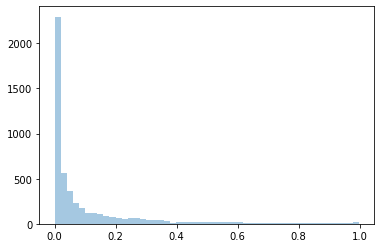

In [11]:
plot_1 = sns.distplot(b1_pvalue, kde=False)

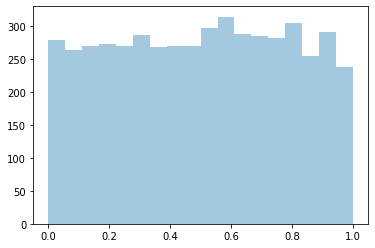

In [12]:
plot_2 =sns.distplot(b2_pvalue, kde=False)
